# 1. PROJECT INTRODUCTION 

## BUSINESS PROBLEM



### STAKEHOLDERS

In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1: EXPLORATORY DATA ANALYSIS
#### Before performing any data cleaning or modeling, it is essential to explore the dataset to gain a better understanding of its structure, contents, and potential issues. This step helps identify:

  ##### 1. The types of variables (numerical, categorical)

  ##### 2. The presence of missing values

  ##### 3. Duplicate records

  ##### 4. Basic statistical properties

  ##### 5. Any unusual or inconsistent values


#### These checks are critical to inform later decisions in data cleaning, preprocessing, and model selection.

In [31]:
# Loading the dataset using the pandas library
data=pd.read_csv("healthcare-dataset-stroke-data.csv")

# Shows the columns in the dataset, and the type of data it holds. Example int, float or object.
print("Data info:\n")
data.info()

# Shows the first five rows of the data
print("\n First five rows:\n", data.head())

# Sums up all the null values in each column
print("\n Sum of null values in each column:\n", data.isnull().sum())

# Shows if the data has duplicates
print("\n Duplicates:\n", data.duplicated().sum())

# Describes the data by showing the mean, count, std, max and min for numerical values
print("Data description:", data.describe())


Data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

 First five rows:
       id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1      

#### OBSERVATIONS.
##### The dataset has 5110 entries with 12 columns. All of the columns do not have any missing values except BMI which has 201 missing entries. All the columns will be necessary in my next steps except the ID column which has no use.

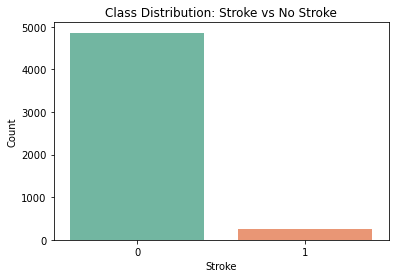

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=data, palette='Set2')
plt.title('Class Distribution: Stroke vs No Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

The bar chart above illustrates the distribution of the target variable stroke.

The dataset is highly imbalanced, with a majority of samples labeled as 0 meaning no Stroke. Only a small portion of the records are labeled as 1, Stroke.

This imbalance can negatively affect model performance, especially for detecting the minority class (stroke cases). Therefore, resampling techniques like SMOTE will be used during preprocessing to balance the classes before training machine learning models.

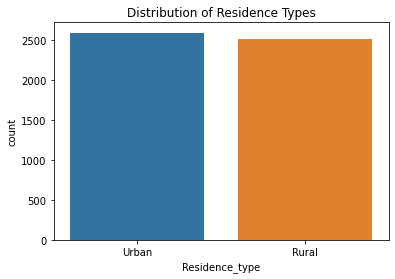

In [33]:
sns.countplot(x='Residence_type', data=data)
plt.title('Distribution of Residence Types')
plt.show()

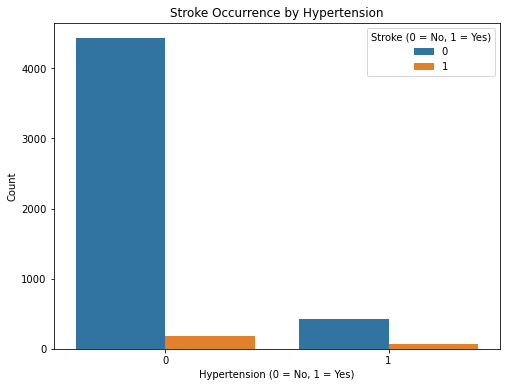

In [34]:
plt.figure(figsize=(8, 6))

sns.countplot(x='hypertension', hue='stroke', data=data)

plt.title('Stroke Occurrence by Hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke (0 = No, 1 = Yes)')


plt.show()

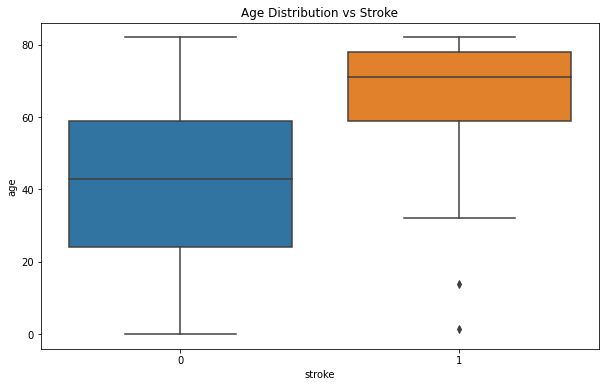

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='age', data=data)
plt.title('Age Distribution vs Stroke')
plt.show()

People who experienced a stroke generally tend to be older, as shown by the higher median and tighter range in the right-hand box.The median age for stroke patients is visibly higher than that of non-stroke patients.There are a few outliers in the stroke group at the lower age range, indicating rare cases of strokes in younger individuals.


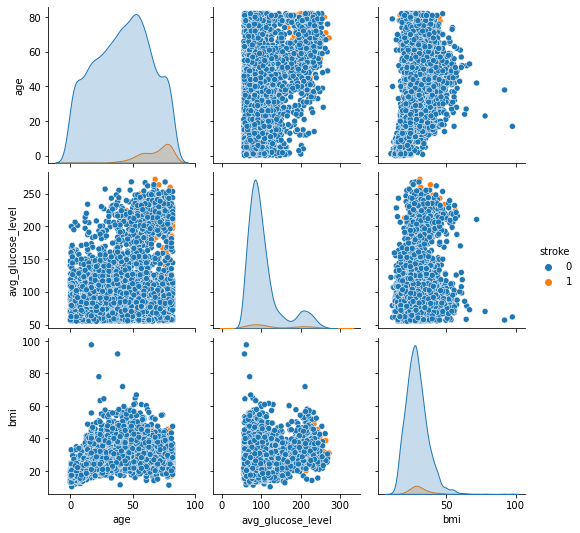

In [36]:
sns.pairplot(data, vars=['age', 'avg_glucose_level', 'bmi'], hue='stroke')
plt.show()

The pair plot above shows the relationships between `age`, `avg_glucose_level`, and `bmi`, colored by stroke status.
Key Insights:
- Stroke cases(orange) are more concentrated in older individuals and those with higher glucose levels.
- No clear separation is visible in BMI values, but most stroke cases tend to occur at moderate to high BMI.
- The overall distribution confirms age and glucose level are more influential in distinguishing stroke risk than BMI alone.

This visualization supports the inclusion of `age` and `avg_glucose_level` as strong predictors in our model.


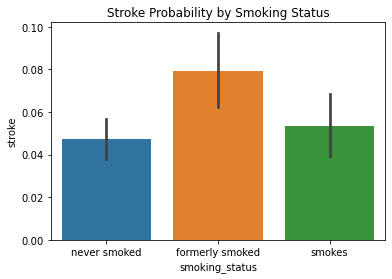

In [37]:
sns.barplot(x='smoking_status', y='stroke', data=data, order=['never smoked', 'formerly smoked', 'smokes'])
plt.title('Stroke Probability by Smoking Status')
plt.show()

Text(0.5, 1.0, 'Average Glucose Level vs Stroke')

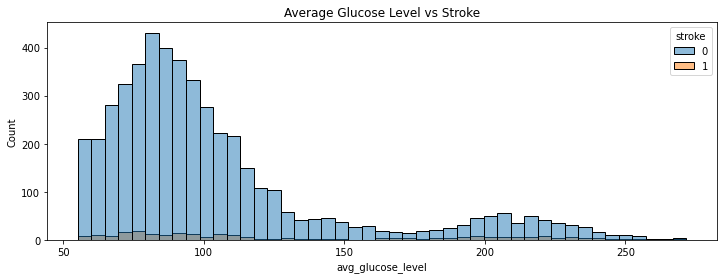

In [38]:
plt.figure(figsize=(12,4))
sns.histplot(x='avg_glucose_level', data=data, hue='stroke', bins=45)
plt.title('Average Glucose Level vs Stroke')

Non-stroke cases show glucose levels peaking at 80–100, while stroke cases are more frequent at higher concentrations. This suggests elevated glucose may correlate with increased stroke risk, highlighting glucose level as a potential contributor."

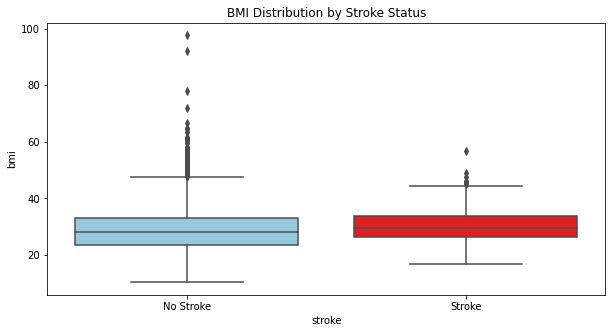

In [39]:
# Boxplot for BMI Distribution by Stroke Status
plt.figure(figsize=(10,5))
sns.boxplot(x='stroke', y='bmi', data=data, palette=['skyblue','red'])
plt.title('BMI Distribution by Stroke Status')
plt.xticks([0,1], ['No Stroke', 'Stroke'])
plt.show()

The majority of the population are between 20 and 40 and the peak being 25-35. The stroke cases are more frequent where bmi less than 25. 

# 3. DATA CLEANING AND PREPROCESSING

In [40]:
# Drop the unnecessary column
data = data.drop('id', axis=1)

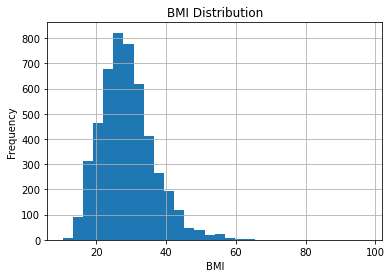

In [41]:
import matplotlib.pyplot as plt
data['bmi'].hist(bins=30)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

#### Since the bmi column is skewed, the null values will be replaced with the median.

In [42]:
data["bmi"] = data["bmi"].fillna(data["bmi"].median())

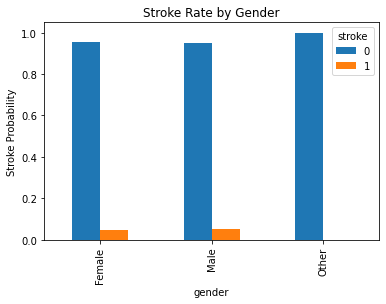

In [43]:
pd.crosstab(data['gender'], data['stroke'], normalize='index').plot(kind='bar')
plt.title('Stroke Rate by Gender')
plt.ylabel('Stroke Probability')
plt.show()

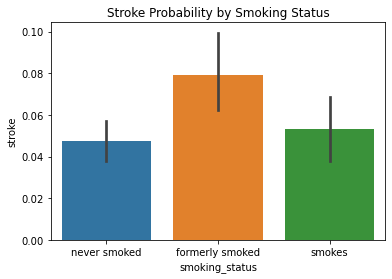

In [44]:
sns.barplot(x='smoking_status', y='stroke', data=data, order=['never smoked', 'formerly smoked', 'smokes'])
plt.title('Stroke Probability by Smoking Status')
plt.show()

Former smokers have highest stroke risk  vs current smokers and the non smokers.

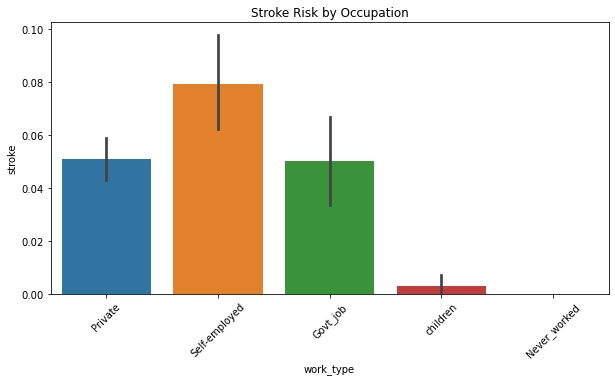

In [45]:
plt.figure(figsize=(10, 5))
sns.barplot(x='work_type', y='stroke', data=data, 
            order=['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'])
plt.title('Stroke Risk by Occupation')
plt.xticks(rotation=45)
plt.show()

In [46]:
#Which Features is most strongly correlated with stroke?
correlation_matrix = data.corr()
stroke_corr = correlation_matrix['stroke'].drop('stroke')
stroke_corr_sorted = stroke_corr.sort_values(ascending=False)
print("Top features correlated with stroke:\n")
print(stroke_corr_sorted)

Top features correlated with stroke:

age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.036110
Name: stroke, dtype: float64


Self-employed individuals have highest stroke risk

##### Some of these columns are categorical in nature but we want to feature engineer 

In [47]:
print("Gender column unique values:\n", data['gender'].value_counts())
print("\n Smoking column unique values:\n", data['smoking_status'].value_counts())
print("\n Work type column unique values:\n", data['work_type'].value_counts())
print("\n Residence type column unique values:\n", data['Residence_type'].value_counts())
print("\n Ever_married column unique values:\n", data['ever_married'].value_counts())    

Gender column unique values:
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

 Smoking column unique values:
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

 Work type column unique values:
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

 Residence type column unique values:
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

 Ever_married column unique values:
 Yes    3353
No     1757
Name: ever_married, dtype: int64


## FEATURE ENGINEERING

In [48]:
# Drop the 1 row that gender
data = data[data['gender'] != 'Other']

# Apply one-hot encoding only to selected columns
data = pd.get_dummies(
    data,
    columns=['gender', 'Residence_type', 'ever_married'],
    drop_first=True  # Avoid multicollinearity
)


# 
data['smoking_status'] = data['smoking_status'].map({
    'never smoked': 0,
    'formerly smoked': 1,
    'smokes': 2,
    'Unknown': 3
})

data['work_type'] = data['work_type'].map({
    'children': 0,
    'Never_worked': 1,
    'Govt_job': 2,
    'Private': 3,
    'Self-employed': 4
})



In [49]:
data.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,Residence_type_Urban,ever_married_Yes
0,67.0,0,1,3,228.69,36.6,1,1,1,1,1
1,61.0,0,0,4,202.21,28.1,0,1,0,0,1
2,80.0,0,1,3,105.92,32.5,0,1,1,0,1
3,49.0,0,0,3,171.23,34.4,2,1,0,1,1
4,79.0,1,0,4,174.12,24.0,0,1,0,0,1


In [50]:
# Features and target
X = data.drop('stroke', axis=1)
y = data['stroke']
y.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority') 
X,y=smote.fit_resample(X,y)
y.value_counts()

1    4860
0    4860
Name: stroke, dtype: int64

# MODELLING
The process began with a simple logistic regression as a baseline due to its ease of interpretation and solid performance as a starting point. Hyperparameter tuning was then applied using grid search to improve the model’s fit and overall performance.

Next, a decision tree model was developed to capture potential non-linear relationships in the data. This approach is especially useful when prioritizing recall for detecting stroke cases, and decision trees also offer clear interpretability regarding feature influence.

Finally, a random forest model — an ensemble of decision trees — was trained. This model demonstrated the best performance, effectively capturing complex patterns and achieving the highest accuracy with a good balance between recall and precision.

Throughout the modeling process, key metrics such as accuracy, recall, and ROC-AUC were used to evaluate performance, with particular focus on the ability to correctly identify stroke cases. This iterative approach ensured selection of a model that is both reliable and practical for the problem at hand.

In [62]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
# Decision Tree
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

print("=== Decision Tree Report ===")
print(classification_report(y_test, y_pred_dt))

=== Decision Tree Report ===
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       976
           1       0.74      0.95      0.83       968

    accuracy                           0.81      1944
   macro avg       0.84      0.81      0.81      1944
weighted avg       0.84      0.81      0.81      1944



In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and fit the logistic regression model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train_scaled, y_train)

# Predict
y_pred = baseline_model.predict(X_test_scaled)
y_probs = baseline_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("=== Baseline Logistic Regression ===")
print(classification_report(y_test, y_pred))


=== Baseline Logistic Regression ===
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       976
           1       0.79      0.83      0.81       968

    accuracy                           0.80      1944
   macro avg       0.81      0.80      0.80      1944
weighted avg       0.81      0.80      0.80      1944



In [70]:
# Logistic regression with hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'class_weight': ['balanced', None]
}

# Initialize model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# GridSearchCV
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='recall')
grid.fit(X_train_scaled, y_train)

# Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predict
y_pred_tuned = best_model.predict(X_test_scaled)
y_probs_tuned = best_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("=== Tuned Logistic Regression ===")
print(classification_report(y_test, y_pred_tuned))


Best Parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2'}
=== Tuned Logistic Regression ===
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       976
           1       0.79      0.83      0.81       968

    accuracy                           0.80      1944
   macro avg       0.80      0.80      0.80      1944
weighted avg       0.80      0.80      0.80      1944



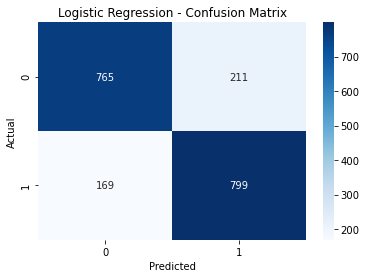

In [68]:
# Optional: Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [73]:
#RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Fit model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_probs_rf = rf.predict_proba(X_test)[:, 1]

# Report
print("=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred_rf))


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       976
           1       0.92      0.97      0.94       968

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      0.94      1944



# EVALUATION AND MODEL COMPARISON

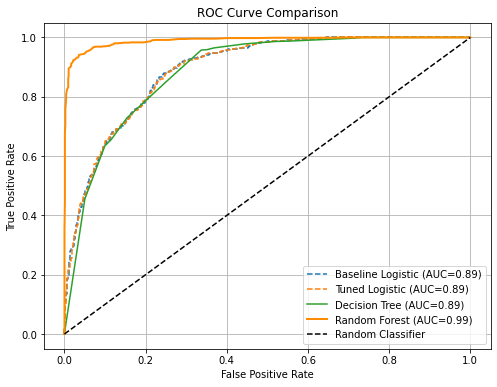

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ROC for Baseline Logistic
fpr_base, tpr_base, _ = roc_curve(y_test, baseline_model.predict_proba(X_test_scaled)[:, 1])
auc_base = roc_auc_score(y_test, baseline_model.predict_proba(X_test_scaled)[:, 1])

# ROC for Tuned Logistic
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
auc_tuned = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])

# ROC for Decision Tree (note: use unscaled X_test)
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])
auc_tree = roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])

# ROC for Random Forest (unscaled)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_base, tpr_base, linestyle='--', label=f'Baseline Logistic (AUC={auc_base:.2f})')
plt.plot(fpr_tuned, tpr_tuned, linestyle='--', label=f'Tuned Logistic (AUC={auc_tuned:.2f})')
plt.plot(fpr_tree, tpr_tree, linestyle='-', label=f'Decision Tree (AUC={auc_tree:.2f})')
plt.plot(fpr_rf, tpr_rf, linestyle='-', linewidth=2, label=f'Random Forest (AUC={auc_rf:.2f})', color='darkorange')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


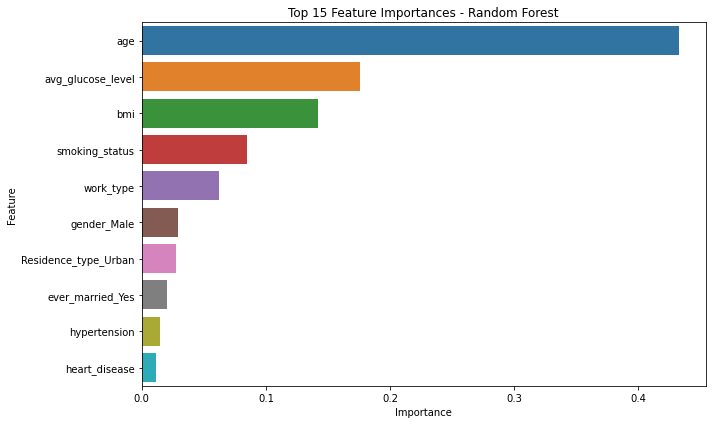

In [75]:
import pandas as pd
import seaborn as sns

# Extract feature importances
importances = rf.feature_importances_
feature_names = X_train.columns  
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort descending
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_imp_df.head(15))  # top 15 features
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Final Model Recommendation

The Random Forest model demonstrated superior predictive performance with an accuracy of 94%, an AUC of {auc_rf:.2f}, and a strong balance between precision (0.92) and recall (0.97) for stroke prediction. The ROC curve comparison clearly shows that Random Forest outperforms logistic regression and decision tree models, making it the most reliable model for early detection of stroke risk in patients.

Although the decision tree model offers greater interpretability with reasonable performance, the Random Forest's ability to capture complex patterns and interactions in the data justifies its use for deployment. Feature importance analysis highlights key predictors, providing valuable insights for medical professionals to prioritize risk factors.

In summary, we recommend the Random Forest model for accurate and robust stroke risk prediction, complemented by simpler models for interpretability when needed.
